In [12]:
import os
from collections import Counter
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
LABEL_DIR = "dataset/yolo/train/labels"
IMAGE_DIR = "dataset/yolo/train/images"

In [7]:
PROJECT_ROOT = Path.cwd().parent
LABEL_DIR = PROJECT_ROOT / LABEL_DIR
IMAGE_DIR = PROJECT_ROOT / IMAGE_DIR

print(LABEL_DIR.exists(), IMAGE_DIR.exists())

True True


In [ ]:
objects_per_image = []
class_counter = Counter()

label_files = [f for f in os.listdir(LABEL_DIR) if f.endswith(".txt")]

for lf in label_files:
    path = os.path.join(LABEL_DIR, lf)
    with open(path, "r") as f:
        lines = f.readlines()
        
        num_objects = len(lines)
        objects_per_image.append(num_objects)

In [ ]:
objects_per_image = np.array(objects_per_image)

print("=== Objects per Image ===")
print(f"Total images      : {len(objects_per_image)}")
print(f"Total objects     : {objects_per_image.sum()}")
print(f"Average / image   : {objects_per_image.mean():.2f}")
print(f"Min / image       : {objects_per_image.min()}")
print(f"Max / image       : {objects_per_image.max()}")

print("\n=== Density Analysis ===")
print(f"Images with 0-5 objects  : {(objects_per_image <= 5).sum()}")
print(f"Images with 6-15 objects : {((objects_per_image > 5) & (objects_per_image <= 15)).sum()}")
print(f"Images with >15 objects  : {(objects_per_image > 15).sum()}")

# print("\n=== Class Distribution ===")
# for cls, cnt in class_counter.items():
#     print(f"Class {cls}: {cnt} objects")

# imbalance_ratio = max(class_counter.values()) / min(class_counter.values())
# print(f"\nImbalance ratio (max/min): {imbalance_ratio:.2f}")

=== Objects per Image ===
Total images      : 7203
Total objects     : 46070
Average / image   : 6.40
Min / image       : 1
Max / image       : 372

=== Density Analysis ===
Images with 0-5 objects  : 5576
Images with 6-15 objects : 1093
Images with >15 objects  : 534


# Objects per Image

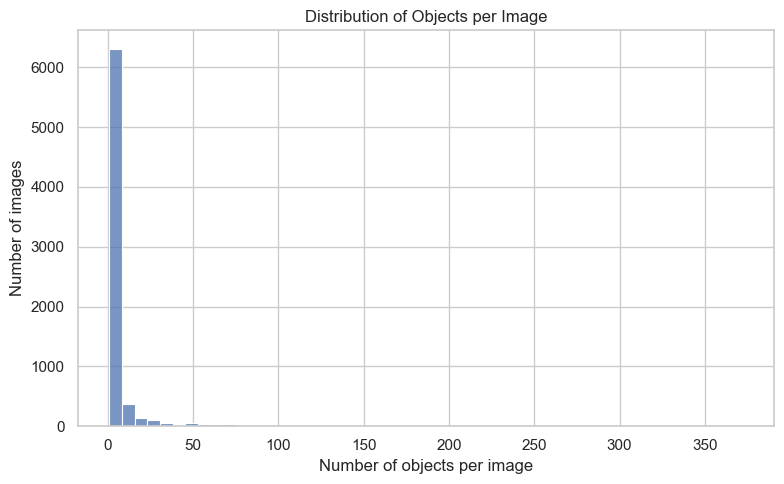

In [17]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(objects_per_image, bins=50, kde=False)
plt.xlabel("Number of objects per image")
plt.ylabel("Number of images")
plt.title("Distribution of Objects per Image")
plt.tight_layout()
plt.show()

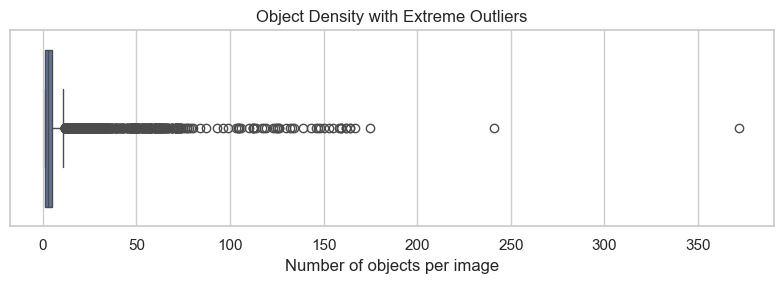

In [14]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=objects_per_image)
plt.xlabel("Number of objects per image")
plt.title("Object Density with Extreme Outliers")
plt.tight_layout()
plt.show()

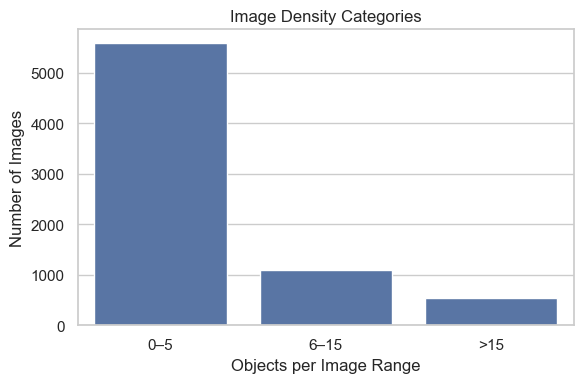

In [18]:
bins = ["0–5", "6–15", ">15"]
values = [
    (objects_per_image <= 5).sum(),
    ((objects_per_image > 5) & (objects_per_image <= 15)).sum(),
    (objects_per_image > 15).sum()
]

plt.figure(figsize=(6, 4))
sns.barplot(x=bins, y=values)
plt.xlabel("Objects per Image Range")
plt.ylabel("Number of Images")
plt.title("Image Density Categories")
plt.tight_layout()
plt.show()

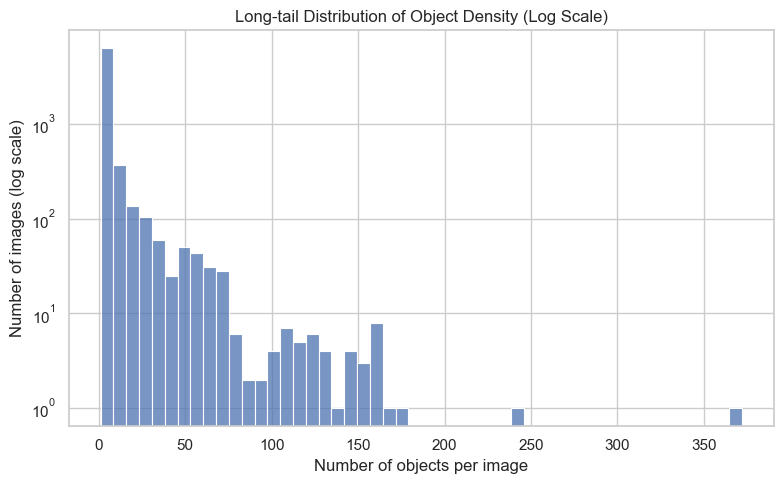

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(objects_per_image, bins=50)
plt.yscale("log")
plt.xlabel("Number of objects per image")
plt.ylabel("Number of images (log scale)")
plt.title("Long-tail Distribution of Object Density (Log Scale)")
plt.tight_layout()
plt.show()

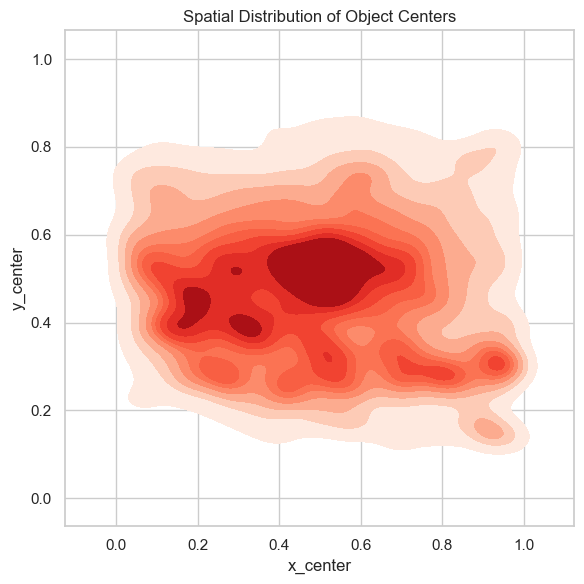

In [20]:


xs, ys = [], []

for lf in label_files:
    with open(os.path.join(LABEL_DIR, lf)) as f:
        for line in f:
            _, x, y, _, _ = map(float, line.split())
            xs.append(x)
            ys.append(y)

plt.figure(figsize=(6,6))
sns.kdeplot(x=xs, y=ys, fill=True, cmap="Reds", thresh=0.05)
plt.xlabel("x_center")
plt.ylabel("y_center")
plt.title("Spatial Distribution of Object Centers")
plt.tight_layout()
plt.show()

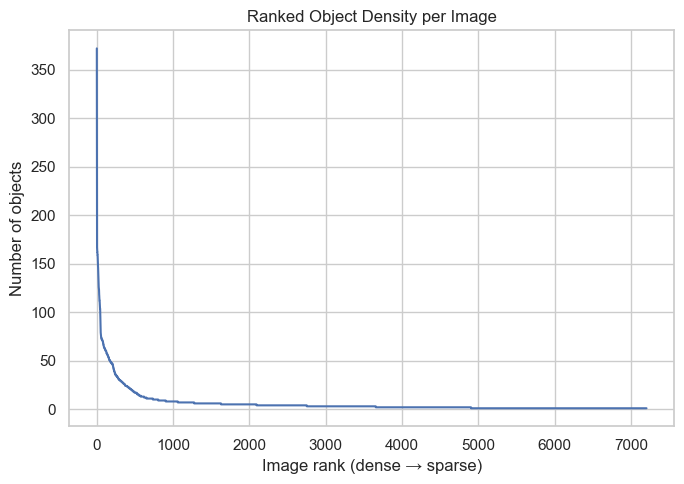

In [21]:
ranked = sorted(objects_per_image, reverse=True)

plt.figure(figsize=(7,5))
plt.plot(ranked)
plt.xlabel("Image rank (dense → sparse)")
plt.ylabel("Number of objects")
plt.title("Ranked Object Density per Image")
plt.tight_layout()
plt.show()